## Data visualisation for the following types of NoSQL data
- Document Databases
- Key Value stores
- Graph Data

### 1) Document Databases

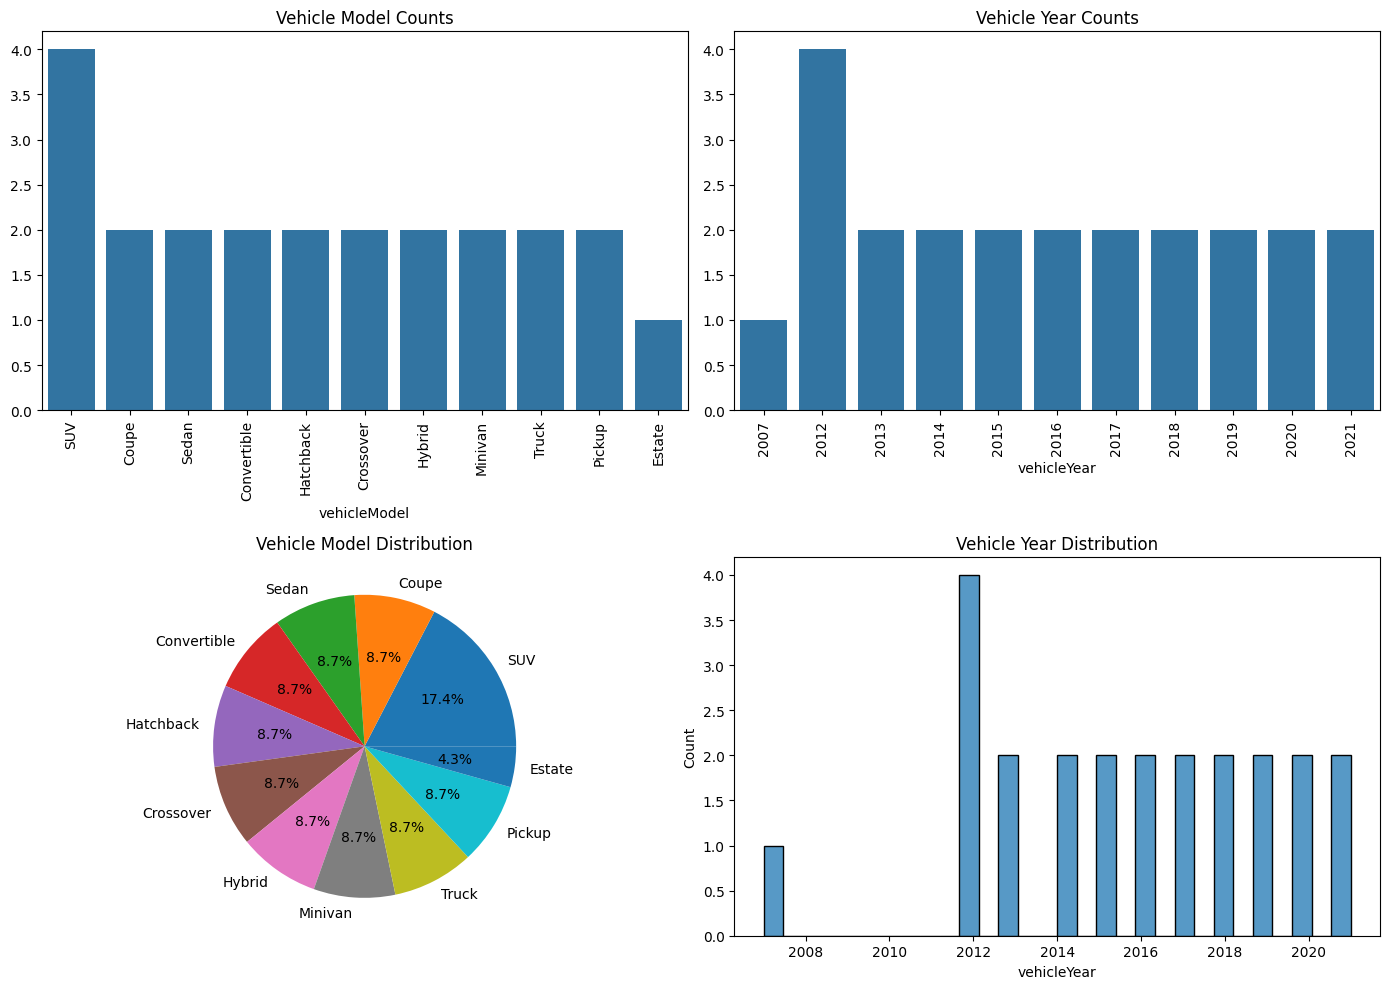

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_json('data/document_db.json')

model_counts = df['vehicleModel'].value_counts()
year_counts = df['vehicleYear'].value_counts()

f, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x=model_counts.index, y=model_counts.values, ax=axes[0, 0])
axes[0, 0].set_title('Vehicle Model Counts')
plt.sca(axes[0, 0])
plt.xticks(rotation=90)

sns.barplot(x=year_counts.index, y=year_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Vehicle Year Counts')
plt.sca(axes[0, 1])
plt.xticks(rotation=90)

axes[1, 0].pie(model_counts.values, labels=model_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Vehicle Model Distribution')

sns.histplot(df['vehicleYear'], ax=axes[1, 1], kde=False, bins=30)
axes[1, 1].set_title('Vehicle Year Distribution')

plt.tight_layout()

### 2) Key Value Stores

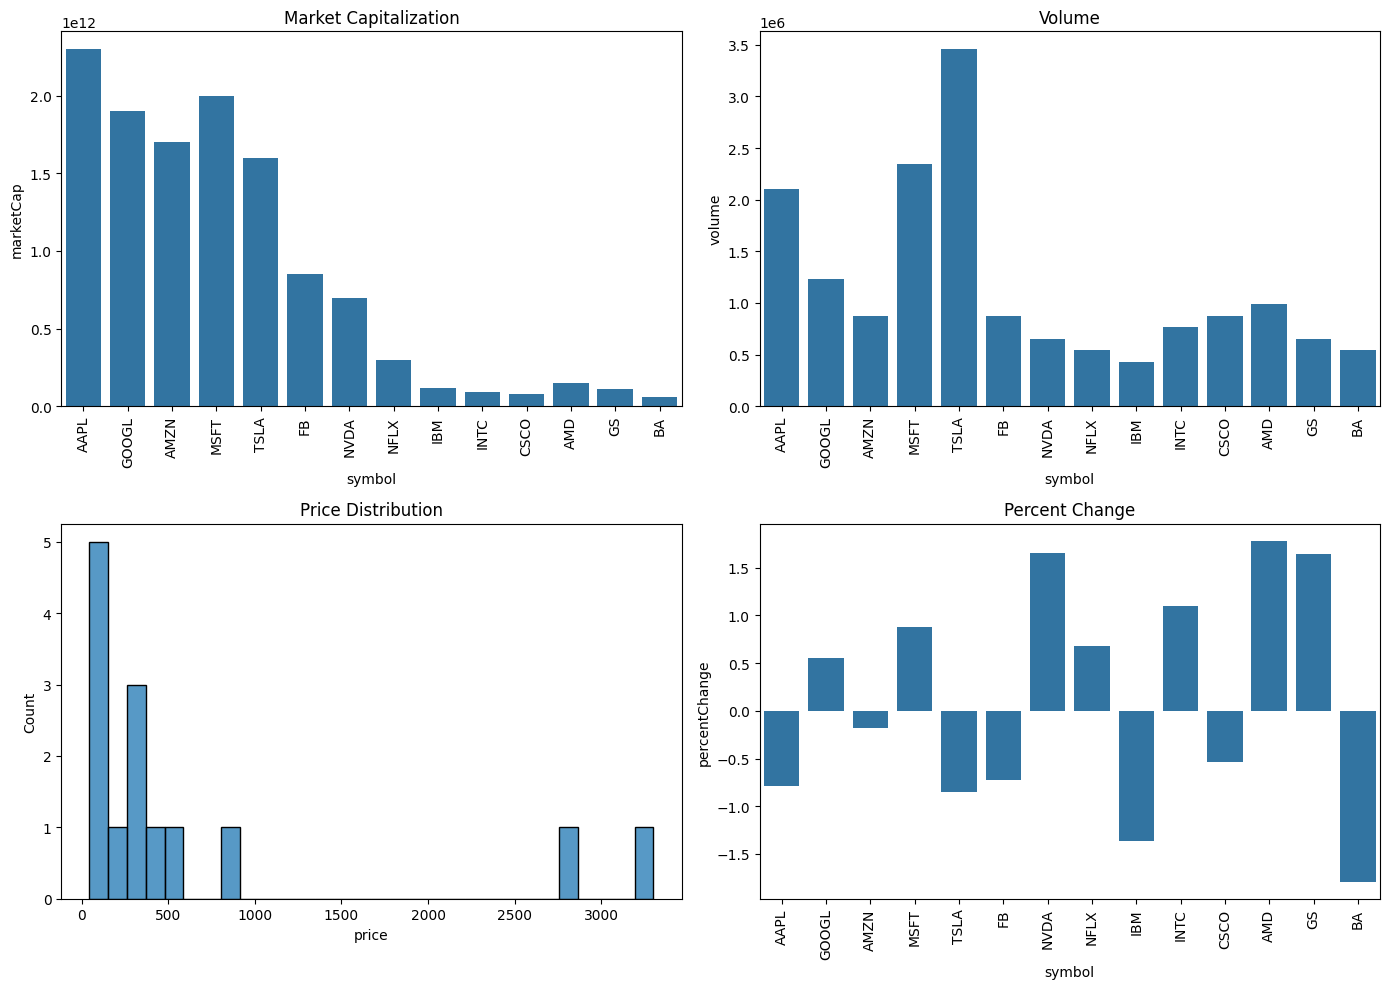

In [12]:
import json

with open('data/key_value_db.json') as f:
    data = json.load(f)
df = pd.DataFrame(data.values())

f, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='symbol', y='marketCap', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Market Capitalization')
plt.sca(axes[0, 0])
plt.xticks(rotation=90)

sns.barplot(x='symbol', y='volume', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Volume')
plt.sca(axes[0, 1])
plt.xticks(rotation=90)

sns.histplot(df['price'], ax=axes[1, 0], kde=False, bins=30)
axes[1, 0].set_title('Price Distribution')

sns.barplot(x='symbol', y='percentChange', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Percent Change')
plt.sca(axes[1, 1])
plt.xticks(rotation=90)

plt.tight_layout()

### 3) Graph Data
Consists of data of authors that have similar genre

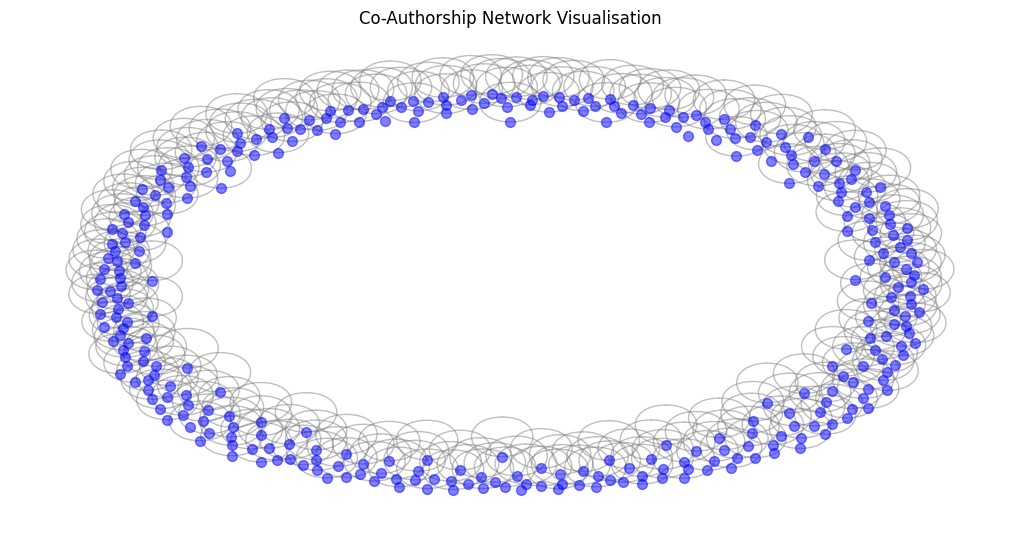

In [13]:
import networkx as nx

authors_df = pd.read_csv("data/graph_data/author_id.csv")
edges_df = pd.read_csv("data/graph_data/co_author_relation.csv")
features_df = pd.read_csv("data/graph_data/author_coauthor_features.csv")

features_subset = features_df.sample(n=50)
G = nx.Graph()

for index,row in authors_df.iterrows():
    G.add_node(row["Author"],label="Author ID")

for index,row in edges_df.iterrows():
    G.add_edge(row["Author1"],row["Author1"])
    
plt.figure(figsize=(10,5))
nx.draw(G,node_size=50,node_color="blue",alpha=0.5,edge_color="gray",with_labels=False)
plt.title("Co-Authorship Network Visualisation")
plt.show()